-- Kevin Mpunga --

# Wine Quality Prediction

<b>The deadline for the notebook is 23/08/2023</b>.


<b>The deadline for the video is 27/08/2023</b>.

## The dataset

You are asked to predict wine quality, based on its physical characteristics. The dataset is provided in the accompanying file 'winequality-white.csv'. A full description of the data set can be found in the file 'metadata.txt'.

The data set can be loaded using following commands (make sure to put the dataset in your iPython notebook directory):

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import joblib
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# decisiont tree toevoegen 
from sklearn.tree import DecisionTreeClassifier

#read and randomly shuffle data
winequality = pd.read_csv('winequality-white.csv', sep=';')

## Minimum Requirements

You will need to train at least 3 different models on the data set. Make sure to include the reason for your choice (e.g., for dealing with categorical features).

* Define the problem, analyze the data, prepare the data for your model.
* Train at least 3 models (e.g. decision trees, nearest neighbour, ...) to predict whether a mushroom is of poisonous or edible. You are allowed to use any machine learning model from scikit-learn or other methods, as long as you motivate your choice.
* For each model, optimize the model parameters settings (tree depth, hidden nodes/decay, number of neighbours,...). Show which parameter setting gives the best model.
* Compare the best parameter settings for the models and estimate their errors on unseen data. Investigate the learning process critically (overfitting/underfitting). Can you show that one of the models performs better?

All results, plots and code should be handed in as an interactive <a href='http://ipython.org/notebook.html'>iPython notebook</a>. Simply providing code and plots does not suffice, you are expected to accompany each technical section by explanations and discussions on your choices/results/observation/etc in the notebook and in a video (by recording your screen en voice). 

<b>The deadline for the notebook is 23/08/2023</b>.

<b>The deadline for the video is 27/08/2023</b>.

## Optional Extensions

You are encouraged to try and see if you can further improve on the models you obtained above. This is not necessary to obtain a good grade on the assignment, but any extensions on the minimum requirements will count for extra credit. Some suggested possibilities to extend your approach are:

* Build and host an API for your best performing model. You can create a API using pyhton frameworks such as FastAPI, Flask, ... You can host een API for free on Heroku, using your student credit on Azure, ...
* Try to combine multiple models. Ensemble and boosting methods try to combine the predictions of many, simple models. This typically works best with models that make different errors. Scikit-learn has some support for this, <a href="http://scikit-learn.org/stable/modules/ensemble.html">see here</a>. You can also try to combine the predictions of multiple models manually, i.e. train multiple models and average their predictions
* You can always investigate whether all features are necessary to produce a good model. Feel free to lookup additional resources and papers to find more information, see e.g <a href='https://scikit-learn.org/stable/modules/feature_selection.html'> here </a> for the feature selection module provided by scikit-learn library.

## Additional Remarks

* Depending on the model used, you may want to <a href='http://scikit-learn.org/stable/modules/preprocessing.html'>scale</a> or <a href='https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features'>encode</a> your (categorical) features X and/or outputs y
* Refer to the <a href='http://scipy.org/docs.html'>SciPy</a> and <a href='http://scikit-learn.org/stable/documentation.html'>Scikit learn</a> documentations for more information on classifiers and data handling.
* You are allowed to use additional libraries, but provide references for these.
* The assignment is **individual**. All results should be your own. Plagiarism will not be tolerated.

In [2]:
winequality.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


## Step 1: define the problem, analyze the data & prepare the data for my model

### we gaan analyseren met wat voor data wij te maken hebben 

In [4]:
winequality.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [115]:
winequality.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### opmerking:
* Er ontbreken geen gegevens.
* quality is een integer, alle andere kolommen zijn Float types. deze types zouden geen probleem mogen stellen voor de datamodellen


### wat  stellen die kolommen voor ? 

In [7]:
metadata = 'metadata.txt'

with open(metadata, 'r') as file:
    tekst = file.read()
print(tekst)

The Wine Quality Dataset involves predicting the quality of white wines on a scale given chemical measures of each wine.

There are 4,898 observations with 11 input variables and one output variable. The variable names are as follows:

Fixed acidity.
Volatile acidity.
Citric acid.
Residual sugar.
Chlorides.
Free sulfur dioxide.
Total sulfur dioxide.
Density.
pH.
Sulphates.
Alcohol.
Quality (score between 0 and 10).


### Correlaties tussen de kolommen? 
We bekijken welke factoren onze main target(Quality)het meeste beinvloeden.

<AxesSubplot:>

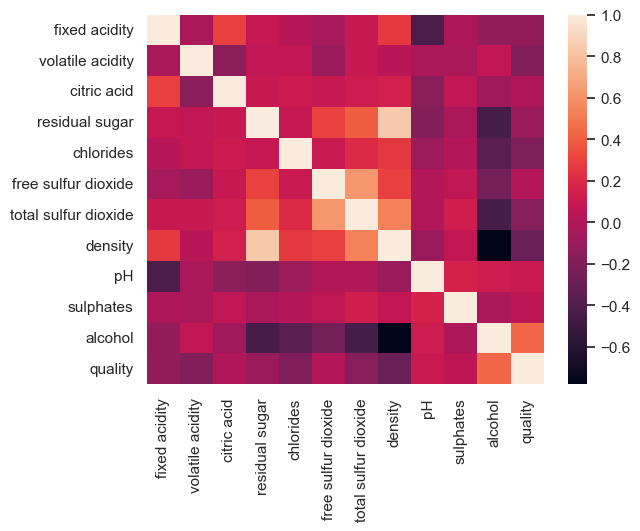

In [116]:
corr = winequality.corr()
sns.heatmap(corr)


#### correlatie met Quality

In [10]:
corr= winequality.corr()
corr['quality'].sort_values(ascending=False)


quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

### Opmerking
* er is een groot evenredig verband tussen de hoeveelheid alcohol die de wijn heeft en de kwaliteitscore

* We zien dat er ook grote omgekeerde evenredig verbanden zijn tussen quality met density, chlorides, volatile acidity en total sulfur dioxide we zullen dit later in detail bekijken

In [15]:
corr= winequality.corr()
corr['alcohol'].sort_values(ascending=False)


alcohol                 1.000000
quality                 0.435575
pH                      0.121432
volatile acidity        0.067718
sulphates              -0.017433
citric acid            -0.075729
fixed acidity          -0.120881
free sulfur dioxide    -0.250104
chlorides              -0.360189
total sulfur dioxide   -0.448892
residual sugar         -0.450631
density                -0.780138
Name: alcohol, dtype: float64

 #### we zullen bekijken hoe dat de gegevens/waarden voor elke kolom verspreid zijn.

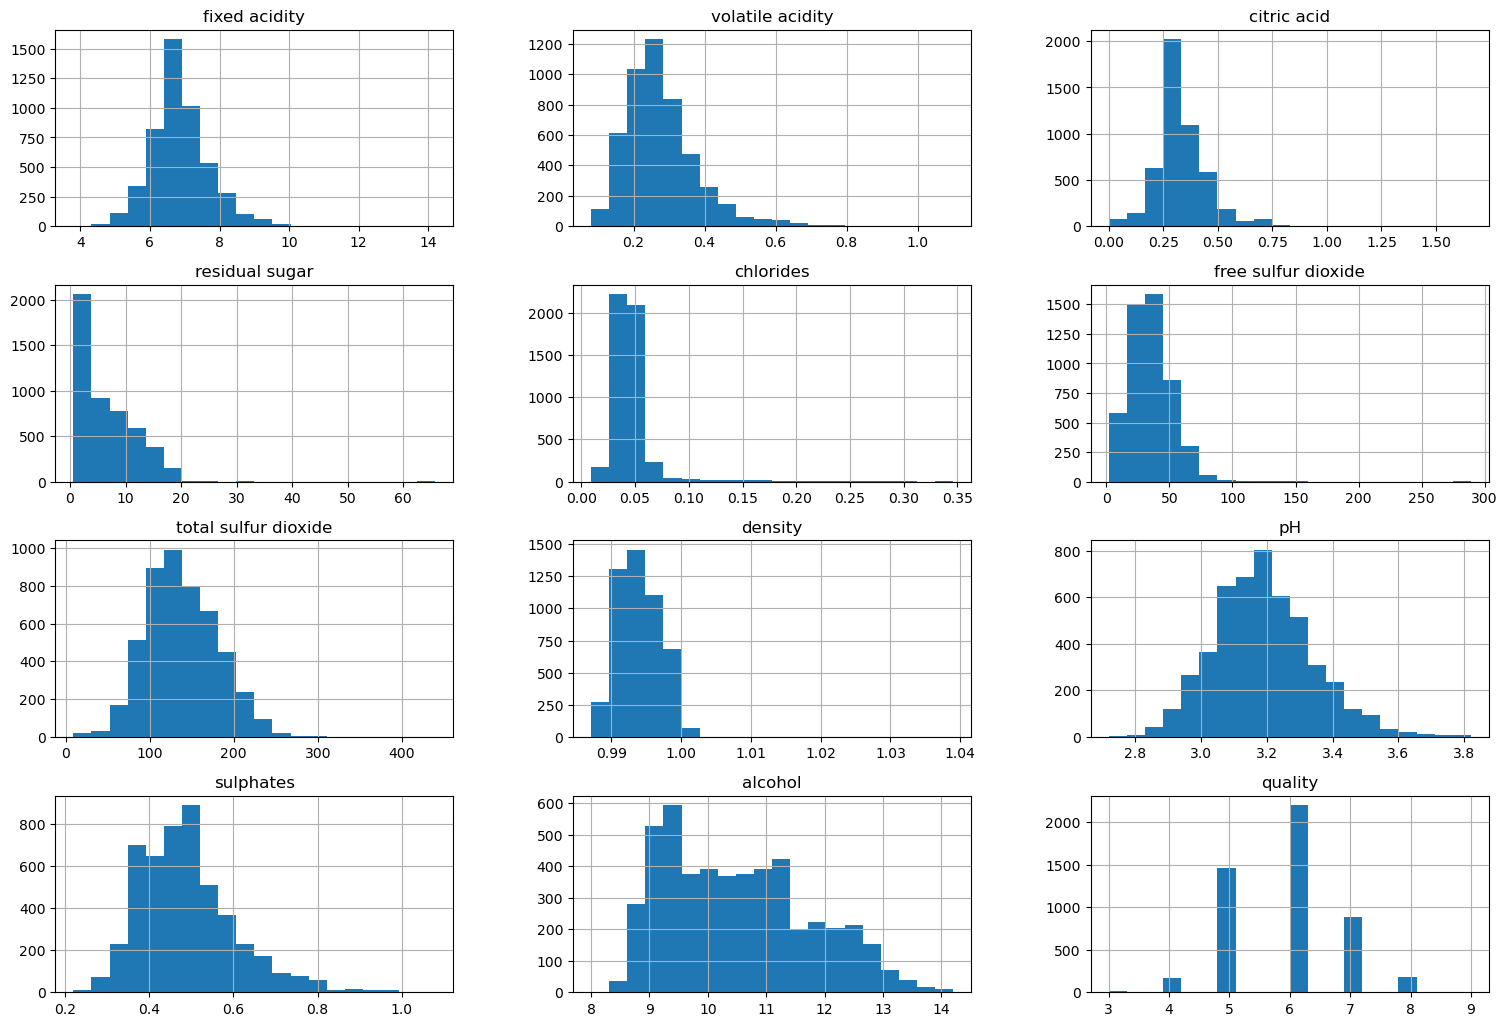

In [5]:
winequality.hist(bins=20)
plt.gcf().set_size_inches(18.5, 12.5)
plt.show()

 ### Opmerking: 

* meer dan de helft van onze observaties heeft een kwaliteitscore van 6  en er zijn  ook nog veel observaties met een score van 5 of 7
* de waarden bij de features "chlorides" en "density"  liggen zeer dicht op mekaar 
* meer dan de helft heeft een residual sugar tussen 1 en 4

 #### we gaan de belangrijkste factoren plotten om een beter begrip te krijgen. 

Text(0.5694444444444517, 0.5, 'Alcohol')

<Figure size 800x500 with 0 Axes>

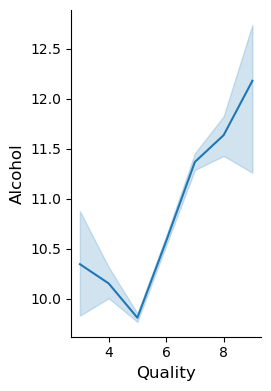

In [7]:
plt.figure(figsize = (8,5))
sns.relplot(data=winequality, x="quality", y="alcohol",kind="line", height=4, aspect=.7)
plt.xlabel("Quality", size=12)
plt.ylabel("Alcohol", size=12)

Text(-8.305555555555548, 0.5, 'Density')

<Figure size 800x500 with 0 Axes>

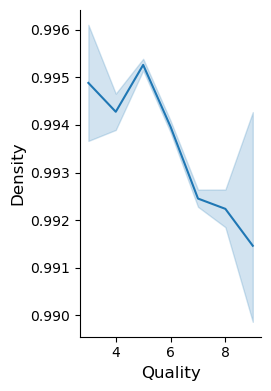

In [8]:
plt.figure(figsize = (8,5))
sns.relplot(data=winequality, x="quality", y="density",kind="line", height=4, aspect=.7)
plt.xlabel("Quality", size=12)
plt.ylabel("Density", size=12)

Text(0.5694444444444517, 0.5, 'Volatile acidity ')

<Figure size 800x500 with 0 Axes>

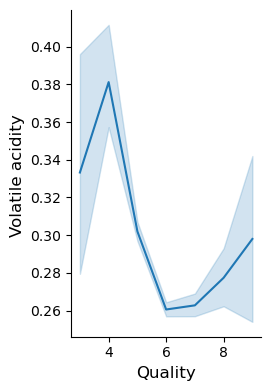

In [10]:
plt.figure(figsize = (8,5))
sns.relplot(data=winequality, x="quality", y="volatile acidity",kind="line", height=4, aspect=.7)
plt.xlabel("Quality", size=12)
plt.ylabel("Volatile acidity ", size=12)

Text(4.944444444444452, 0.5, 'Total sulfur dioxide')

<Figure size 800x500 with 0 Axes>

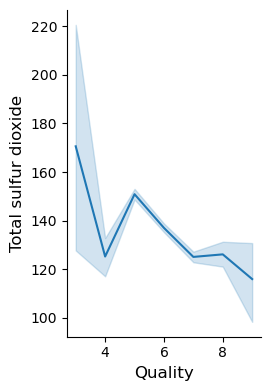

In [12]:
plt.figure(figsize = (8,5))
sns.relplot(data=winequality, x="quality", y="total sulfur dioxide",kind="line", height=4, aspect=.7)
plt.xlabel("Quality", size=12)
plt.ylabel("Total sulfur dioxide", size=12)

Text(0.5694444444444517, 0.5, 'Chlorides')

<Figure size 800x500 with 0 Axes>

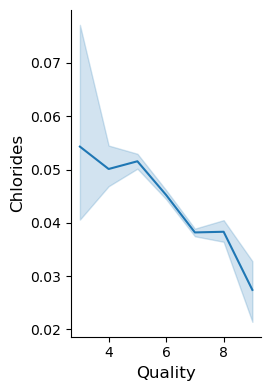

In [13]:
plt.figure(figsize = (8,5))
sns.relplot(data=winequality, x="quality", y="chlorides",kind="line", height=4, aspect=.7)
plt.xlabel("Quality", size=12)
plt.ylabel("Chlorides", size=12)

### Opmerking
* hoe hoger de kwaliteit, hoe: 
    * hoger de alcoholgehalte
    * lager de density 
    * hoe lager de acidity tot en met score 6, erna stijgt het weer. De wijnen met de hoogste scores hebben een acidity tussen 0.28 en 0.30.
    * lager de dioxide over het algemeen verloopt 
    * hoe lager het chloride gehalte. een kleine hoeveelheid aan chloride gehalte gaat al snel gepaard met een nieuwe quality score. 


In [117]:
# We zullen nog eens kijken naar de maximum en minimumwaarden voor de geanalyseere kolommen
winequality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### Opmerking

* Er is geen enkele wijn die een maximum score van 10 heeft gekregen. Alle wijnen hebben een score tussen 3 en 9
* er is een zeer groot verschil in total sulfur dioxide. de laagste scores hebben een betere waarde
* Een hogere alcohol gehalte gaat in het algemeen met een hogere kwaliteitscore

## Data classificeren

we gaan datamodellen gebruiken die optimaal presteren met classification. hierdoor gaan we onze data opsplitsen in klasses:

    slechte wijnnen (score tussen 3 t.e.m 5), mediocre wijnen (score tussen  6 t.e.m 7), en goede wijnen (score tussen 8 t.e.m 9).
    Onze classificatie zal er als volgt uitzien voor de quality score (Goed = 2, Gemiddeld = 1 en Slecht = 0).
    
    

In [12]:
winequality['quality'] = winequality['quality'].replace([3, 4, 5], 0)
winequality['quality'] = winequality['quality'].replace([6,7], 1)
winequality['quality'] = winequality['quality'].replace([8, 9], 2)
winequality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [160]:
categorie_counts=winequality["quality"].value_counts()
print(categorie_counts)


1    3078
0    1640
2     180
Name: quality, dtype: int64


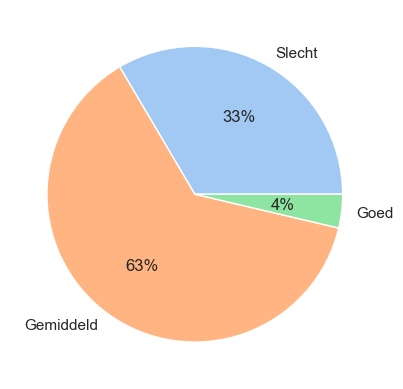

In [28]:
sns.set_theme(style="darkgrid")
colors = sns.color_palette('pastel')[0:5]
plt.pie(categories, labels = ["Slecht", "Gemiddeld", "Goed"], colors = colors, autopct='%.0f%%')
plt.show()

### Opmerking

* We merken dat het grootste deel van de wijnen een gemiddelde score heeft gekregen en dat ongeveer 1/3 van de wijnen een slechte score heeft gekregen. Slechts 4% hoog heeft gescoord. Dit is goed om te weten want dat is teken dat er veel meer data is voor de gemiddelde klasse om er op te trainen

## Data scaling and preprocessing

In [13]:

X = winequality.drop(columns=['quality'])
y = winequality['quality']


In [14]:
# data opsplitsen en test data en trainings data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [15]:
# Standardscaler toepassen op de training en test data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [16]:
from sklearn.metrics import accuracy_score, auc, confusion_matrix, precision_score


  #### We kunnen de datamodellen nu toepassen ! 
aangezien we classificatie gebruiken, zullen we de volgende datamodellen toepassen:
* Random Forest model
* K Nearest neighbours model      
* Decision Tree model      

# Model 1: Decision Tree model

In [7]:
from sklearn import tree

<function matplotlib.pyplot.show(close=None, block=None)>

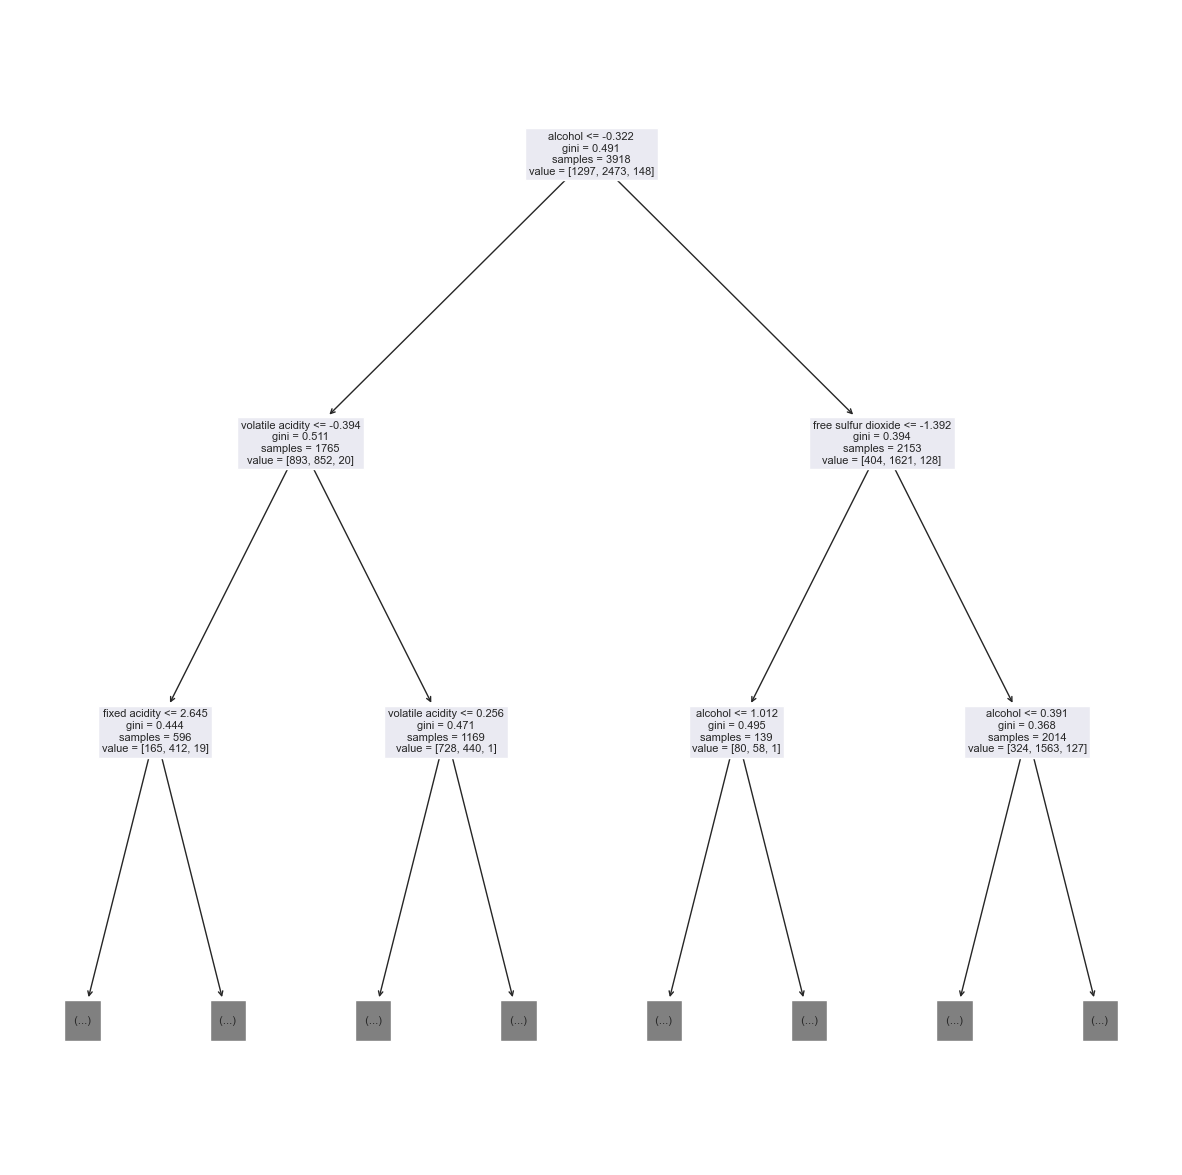

In [124]:
#we plotten de decision tree 
fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(decision.fit(X_train, y_train), feature_names=X.columns, max_depth=2)
plt.show


In [17]:
# instantieer het model en train het model daarna met de test data
decision = DecisionTreeClassifier(random_state = 0)
decision.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [18]:
# nadat het model is getraind gaan we  predicties proberen maken voor zowel trained, als ongeziene data 
predictions_decision = decision.predict(X_test)
predictions_decision_train = decision.predict(X_train)

### Trained data

In [19]:
#we kijken hoe goed dat het model heeft gerwerkt en hoe accuraat het is met trained data

print(classification_report(y_train, predictions_decision_train))

print(f"Decision Tree Model: {accuracy_score(y_train, predictions_decision_train)} \n {recall_score(y_train, predictions_decision_limit)} ")



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1302
           1       1.00      1.00      1.00      2471
           2       1.00      1.00      1.00       145

    accuracy                           1.00      3918
   macro avg       1.00      1.00      1.00      3918
weighted avg       1.00      1.00      1.00      3918

Decision Tree Model: 1.0


### Opmerking
* Bij de testdata krijgen we een prefecte score. Dit is niet abnormaal. We hebben geen limiet ingesteld op hoe diep, of beter gezegd, hoeveel niveau's van vertakkingen het model mag gebruiken om tot het gewenste resultaat te komen.

* een perfecte score is niet goed. Er is kans dat het model vatbaar is voor overfitting. We gaan later een andere aanpak nemen om het model deftig te kunnen analyseren (fine tuning). 
 

### Test data


In [20]:
#we kijken hoe goed dat het model heeft gerwerkt en hoe accuraat het is met test data
print(classification_report(y_test, predictions_decision, zero_division=1))

print(f"Decision Tree Model: {accuracy_score(y_test , predictions_decision)}")


              precision    recall  f1-score   support

           0       0.69      0.66      0.67       338
           1       0.79      0.81      0.80       607
           2       0.39      0.43      0.41        35

    accuracy                           0.74       980
   macro avg       0.63      0.63      0.63       980
weighted avg       0.74      0.74      0.74       980

Decision Tree Model: 0.7418367346938776


### waar is het goed/mis gegaan ?

<function matplotlib.pyplot.show(close=None, block=None)>

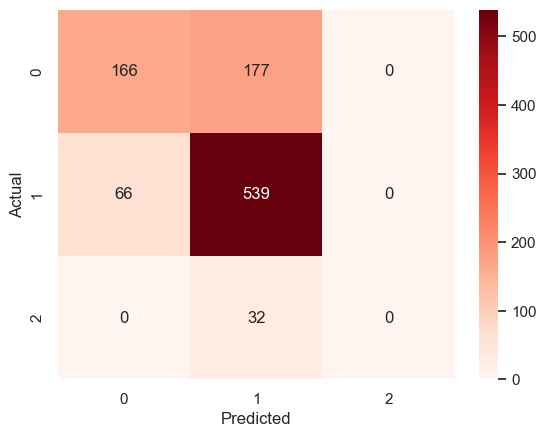

In [130]:
#maak  confusion matrix
cf_matrix = confusion_matrix(y_test, predictions_decision)

#plot  confusion matrix
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show


### Opmerking:

* Het ondervindt moeite om de gemiddelde wijnen te definieren
* Na het instellen van een limiet van het vertakkingen, constateren we dat het model  slechter scoort op de testdata dan op de getrainde data

* het model presteert perfect in training data, maar opmerkelijk slechter bij test data. dit is een teken van overfitting. een reden kan mogelijk zijn omdat het model te complex is voor de data. 

### fine tuning Decision Tree (hyperparameters)

In [57]:

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}


decision_fine = DecisionTreeClassifier()

# grid opstellen met alle mogelijkheden voor alle parameters die zojuist gedeclareerd
decision_optimized = GridSearchCV(estimator=decision_fine,param_grid=param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [59]:
# train het model
decision_optimized.fit(X_train,y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

In [60]:
print(decision_optimized.best_params_)
print(decision_optimized.best_score_)

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.7161817253700867


### Opmerking

De beste parameters hebben de accuraatheid verslechterd.


# Model 2: Random Forest model

In [46]:
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train) 

RandomForestClassifier()

In [47]:
# nadat het model is getraind gaan we  predicties proberen maken voor zowel trained, als ongeziene data 

predictions_randomforest = randomforest.predict(X_test)
predictions_randomforest_train = randomforest.predict(X_train)

### Trained data

In [134]:
# we gaan kijken hoe goed ons model het heeft gedaan met de trained data 
print(classification_report(y_train, predictions_randomforest_train, zero_division=1))
print(f"Random Forest Model: {accuracy_score(y_train, predictions_randomforest_train)}")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1297
           1       1.00      1.00      1.00      2473
           2       1.00      1.00      1.00       148

    accuracy                           1.00      3918
   macro avg       1.00      1.00      1.00      3918
weighted avg       1.00      1.00      1.00      3918

Random Forest Model: 1.0


### Opmerking
* Net bij Decision Tree is het logisch waarom we ook bij Random Forest een perfecte score krijgen.



### Test data

In [49]:
print(classification_report(y_test, predictions_randomforest, zero_division=1))
print(f"Random Forest Model: {accuracy_score(y_test, predictions_randomforest)}")


              precision    recall  f1-score   support

           0       0.78      0.69      0.73       338
           1       0.81      0.89      0.85       607
           2       1.00      0.37      0.54        35

    accuracy                           0.81       980
   macro avg       0.86      0.65      0.71       980
weighted avg       0.81      0.81      0.80       980

Random Forest Model: 0.8051020408163265


<function matplotlib.pyplot.show(close=None, block=None)>

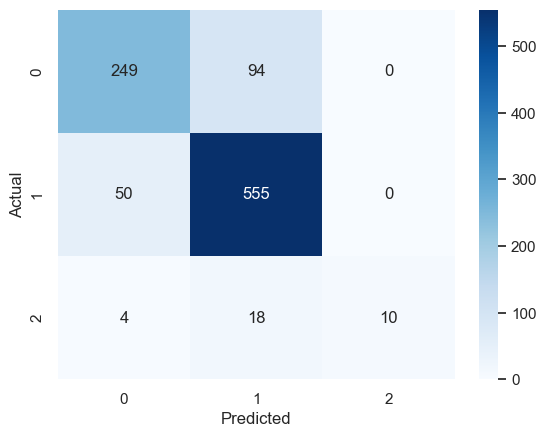

In [136]:
#create the confusion matrix
cf_matrix = confusion_matrix(y_test, predictions_randomforest)

#plot the confusion matrix
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show

### opmerking
* het model heeft vlekkeloos de goede wijnen kunnen herkennen
* Het presteert minder bij de klasse 0.
* net bij decision tree presteert het model veel slechter op unseen data. dit kan weer verwijzen naar overfitting 

### fine tuning Random Forest (hyperparameters)

In [78]:

grid_randomforest = {
    "n_estimators": [10,210,10],
    "max_features": [1,11,1],
    'max_depth':[None,5,10,15]
}

randomforest = RandomForestClassifier()

# grid opstellen met alle mogelijkheden voor alle parameters die zojuist gedeclareerd
randomforest_optimized = GridSearchCV(estimator=randomforest,param_grid=grid_randomforest)

In [79]:
# train het model
randomforest_optimized.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'max_features': [1, 11, 1],
                         'n_estimators': [10, 210, 10]})

In [80]:
print(randomforest_optimized.best_params_)
print(randomforest_optimized.best_score_)

{'max_depth': None, 'max_features': 1, 'n_estimators': 210}
0.8034720593218131


### Opmerking
* de beste parameters zorgen voor een slechtere accuraatheid op de trained data
* Dit resultaat ligt wel dichter bij het resultaat voor de test data.

# Model 3: K Nearest Neighbours model

In [62]:
# instantieer het model en train het model daarna met de test data
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [63]:
# nadat het model is getraind gaan we  predicties proberen maken voor zowel trained, als ongeziene data 
predictions_knn = knn.predict(X_test, )
predictions_knn_train = knn.predict(X_train)


C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

### trained data

In [64]:
print(classification_report(y_train, predictions_knn_train))
print(f"K nearest Model: {accuracy_score(y_train , predictions_knn_train)}")

              precision    recall  f1-score   support

           0       0.79      0.72      0.75      1302
           1       0.82      0.90      0.86      2471
           2       0.70      0.21      0.33       145

    accuracy                           0.81      3918
   macro avg       0.77      0.61      0.65      3918
weighted avg       0.81      0.81      0.80      3918

K nearest Model: 0.812149055640633


### test data

In [65]:
print(classification_report(y_test, predictions_knn))
print(f"K nearest Model: {accuracy_score(y_test , predictions_knn)}")

              precision    recall  f1-score   support

           0       0.65      0.57      0.60       338
           1       0.74      0.82      0.78       607
           2       0.62      0.14      0.23        35

    accuracy                           0.71       980
   macro avg       0.67      0.51      0.54       980
weighted avg       0.70      0.71      0.70       980

K nearest Model: 0.710204081632653


### waar liep het stroef/vlot ? 

<function matplotlib.pyplot.show(close=None, block=None)>

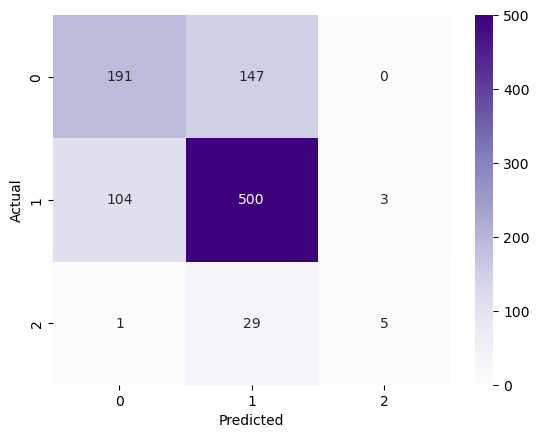

In [66]:

#create the confusion matrix
cf_matrix = confusion_matrix(y_test, predictions_knn)

#plot the confusion matrix
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show


### Opmerking
* het model heeft moeite om goede wijnen te identificeren
* een portie wijnen werden  overschat ( ze zijn slechter dan predicted) bij de gemiddlede klasse 
* een portie wijnen werden  onderschat ( ze zijn beter dan predicted) bij de gemiddlede klasse 
* Het model werkt opmerkelijk slechter voor de test data dan de trained data. Dit kan liggen aan het feit dat er te weinig gegevens zijn voor het model om optimaal te kunnen trainen.
* bij de test data is de precisie score hoger. dit betekent dat op de testdata, wanneer het een positief resultaat voorspelt, het vaker correct is vergeleken met de trainingsdata. Desondanks liggen de recall en F1-scores lager. dit betekent dat het veel positieve instanties mist die het zou moeten vangen. de f1-score ligt ook lager wat teken geeft dat het model in het algemeen lager presteert dan bij trained data

* Dit zijn indicaties op overfitting

### Fine tuning K nearest neighbours (hyperparameters)

In [68]:

knn_neighbors = np.arange(3,13,2)
algorithm = ["auto", "ball_tree", "kd_tree", "brute"]
p = [ 1, 2, 3, 4,5]
grid_knn = {
    'n_neighbors': knn_neighbors,
    'algorithm': algorithm,
    'p': p
}
# grid opstellen met alle mogelijkheden voor alle parameters die zojuist gedeclareerd
knn_optimized = GridSearchCV(estimator=knn,param_grid=grid_knn)

In [69]:
# train het model
knn_optimized.fit(X_train,y_train)

C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mpung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': array([ 3,  5,  7,  9, 11]),
                         'p': [1, 2, 3, 4, 5]})

In [70]:
print(knn_optimized.best_params_)
print(knn_optimized.best_score_)

{'algorithm': 'auto', 'n_neighbors': 9, 'p': 2}
0.7348121432481038


### opmerking 
* We zien duidelijk dat de hyperparameters een tegengestelde effect hebben op het verbeteren van de accuraatheid

# Extra: API maken

We gaan de modellen die we zojuist hebben gemaakt opslaan in files nadat ze getraind zijn. hierna gaan we deze modellen opnieuw gebruiken in een API om voorspellingen te maken zonder de modellen daarvoor opnieuw te moeten trainen.

In [91]:
# vraag het pad op in de current working directory en op basis van dit pad kunnen we de paden aanmaken voor de filenames
dirname = os.getcwd()
filename_randomforest = os.path.join(dirname, 'models\\randomforest')
filename_knn = os.path.join(dirname, 'models\\knn')
filename_decision = os.path.join(dirname, 'models\\decisiontree')

In [93]:
# save de modellen
joblib.dump(randomforest, filename_randomforest)
joblib.dump(knn, filename_knn)
joblib.dump(decision, filename_decision)

['C:\\Users\\Mpung\\OneDrive\\Documenten\\BATI_2\\AI essentials\\assignment-2de-zittijd-2023\\winequality-white 2nd term\\models\\decisiontree']

# Conclusion


zonder fine tuning zien we duidelijk dat het random forest model de meest accurate antwoorden heeft kunnen geven. erna volgt KNN en als laatste Decision tree.

Het is the verachten dat the random forest beter presteert dan the decision tree, aangezien dat random forest meerdere decision trees combineert.

met de fine tuning zien we interessante resultaten. De finetuning zorgt voor weinig veranderingen in de accuraatheid. In tegendeel , ze hebben een negatieve invloed op de accuraatheid van de predicties. het is ons geval beter om met default parameters te werken.